#### About

> Regularization

Regularization is a technique used in deep training to prevent overfitting, which occurs when a model learns to perform well on training data but does not generalize very well to unseen data. Regularization methods add penalty terms to the loss function during training to limit the model weights and biases, preventing them from growing too large and reducing the model's ability to overfit. The penalty system encourages the model to learn simpler, smoother, and more general representations, which often results in better performance on unseen data.

regularization loss = loss + λ * regularization term

Where loss is the original loss function without regularization, λ is the regularization parameter that controls the strength of the regularization, and the Regularization term is the penalty term added to the loss function. Advanced education uses several types of validation techniques, including:

1. L1 regularization (Lasso regularization): L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the model weights. This forces the model to learn sparse representations by pushing some weights exactly to zero. 

Regularization term = λ * ||W||1

Where W is the weight matrix of the model, ||W||1 is the L1 norm of the weight matrix (the sum of the absolute values ​​of the weights), and λ is the regularization parameter.

2. L2 regularization (Ridge regularization): L2 regularization is to add a penalty to the loss function that is proportional to the square of the model weight. This encourages the model to learn smaller weights, preventing one weight from dominating the learning process. 

Regularization term = λ * ||W||2^2

where W is the weight matrix of the model, ||W||2 is the L2 norm of the weight matrix (the square root of the sum of the squared values ​​of the weights), and λ is the regularization parameter. 

3. Elastic net regularization: Elastic net regularization is a combination of L1 and L2 regularization. It adds a penalty term to the loss function, which is the weighted sum of the L1 and L2 regularization terms. This provides a balance between sparseness-induced L1 regularization and smoothness-induced L2 regularization. 

Regularization term = λ1 * ||W||1 + λ2 * ||W||2^2

where λ1 and λ2 are the regularization parameters of L1 and L2 regularization, respectively, and W is the weight matrix of the model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import regularizers


2023-04-22 02:40:55.182955: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 02:40:55.244469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 02:40:55.248671: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 02:40:56.577409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [4]:
# Define the regularized model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(28 * 28,),
                kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization with lambda = 0.01
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization with lambda = 0.01
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization with lambda = 0.01
model.add(Dense(10, activation='softmax'))


2023-04-22 02:41:57.992502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-22 02:41:57.993643: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)


Epoch 1/20
422/422 [==============================] - 5s 8ms/step - loss: 1.9518 - accuracy: 0.7801 - val_loss: 1.0067 - val_accuracy: 0.8138
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.9224 - accuracy: 0.8111 - val_loss: 0.8286 - val_accuracy: 0.8222
Epoch 3/20
422/422 [==============================] - 4s 8ms/step - loss: 0.8161 - accuracy: 0.8137 - val_loss: 0.8012 - val_accuracy: 0.8070
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.7630 - accuracy: 0.8196 - val_loss: 0.7305 - val_accuracy: 0.8263
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.7304 - accuracy: 0.8231 - val_loss: 0.7332 - val_accuracy: 0.8127
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.7023 - accuracy: 0.8280 - val_loss: 0.7116 - val_accuracy: 0.8238
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.6842 - accuracy: 0.8312 - val_loss: 0.6746 - val_accuracy: 0.8348
Epoch 

In [7]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.5938915014266968
Test accuracy: 0.8476999998092651


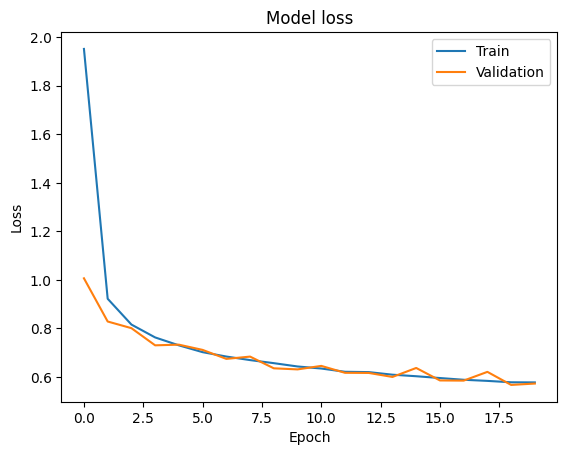

In [8]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()